#### copying the data from s3 to sagemaker

In [22]:
!aws s3 cp s3://viraj-sagemaker/sickness-data/small-set.zip Data/

download: s3://viraj-sagemaker/sickness-data/small-set.zip to Data/small-set.zip


In [1]:
!aws s3 cp s3://viraj-sagemaker/sickness-data/chest_xray.zip Data/

download: s3://viraj-sagemaker/sickness-data/chest_xray.zip to Data/chest_xray.zip


In [2]:
!unzip -o Data/chest_xray.zip

Archive:  Data/chest_xray.zip
   creating: chest_xray/
  inflating: __MACOSX/._chest_xray   
  inflating: chest_xray/.DS_Store    
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
   creating: chest_xray/chest_xray/
   creating: chest_xray/train/
   creating: chest_xray/val/
   creating: chest_xray/test/PNEUMONIA/
   creating: chest_xray/test/NORMAL/
  inflating: chest_xray/chest_xray/.DS_Store  
  inflating: __MACOSX/chest_xray/chest_xray/._.DS_Store  
   creating: chest_xray/chest_xray/test/
   creating: chest_xray/chest_xray/train/
   creating: chest_xray/chest_xray/val/
   creating: chest_xray/train/PNEUMONIA/
   creating: chest_xray/train/NORMAL/
   creating: chest_xray/val/PNEUMONIA/
   creating: chest_xray/val/NORMAL/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACO

### 1. Data Exploration

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data/covid-small-set/metadata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 17 columns):
Patientid         158 non-null int64
offset            119 non-null float64
sex               140 non-null object
age               132 non-null float64
finding           158 non-null object
survival          60 non-null object
view              158 non-null object
modality          158 non-null object
date              158 non-null object
location          139 non-null object
filename          158 non-null object
doi               76 non-null object
 url              158 non-null object
license           37 non-null object
clinical notes    156 non-null object
other notes       83 non-null object
Unnamed: 16       1 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 21.1+ KB


In [4]:
data.head(n=5)

Patientid  offset sex   age   finding survival view modality  \
0          2     0.0   M  65.0  COVID-19        Y   PA    X-ray   
1          2     3.0   M  65.0  COVID-19        Y   PA    X-ray   
2          2     5.0   M  65.0  COVID-19        Y   PA    X-ray   
3          2     6.0   M  65.0  COVID-19        Y   PA    X-ray   
4          4     0.0   F  52.0  COVID-19      NaN   PA    X-ray   

               date                                           location  \
0  January 22, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
1  January 25, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
2  January 27, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
3  January 28, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
4  January 25, 2020  Changhua Christian Hospital, Changhua City, Ta...   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   

                                     clinical notes other notes Unnamed: 16  
0     infiltrate in the upper lobe of the left lung         NaN         NaN  
1          progressive infiltrate and consolidation         NaN         NaN  
2          progressive infiltrate and consolidation         NaN         NaN  
3          progressive infiltrate and consolidation         NaN         NaN  
4  diffuse infiltrates in the bilateral lower lungs         NaN         NaN

In [5]:
data.describe()

Patientid      offset         age
count  158.000000  119.000000  132.000000
mean    39.487342    8.638655   53.303030
std     24.508347    7.268146   15.062181
min      2.000000    0.000000   12.000000
25%     18.250000    4.000000   43.000000
50%     35.500000    7.000000   55.000000
75%     62.750000   10.000000   65.000000
max     86.000000   32.000000   87.000000

In [6]:
#Looking at important features.
df_main = data[['age','sex','finding','survival']]
df_main.head()

age sex   finding survival
0  65.0   M  COVID-19        Y
1  65.0   M  COVID-19        Y
2  65.0   M  COVID-19        Y
3  65.0   M  COVID-19        Y
4  52.0   F  COVID-19      NaN

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [8]:
df_main['sex'].value_counts()

M    87
F    53
Name: sex, dtype: int64

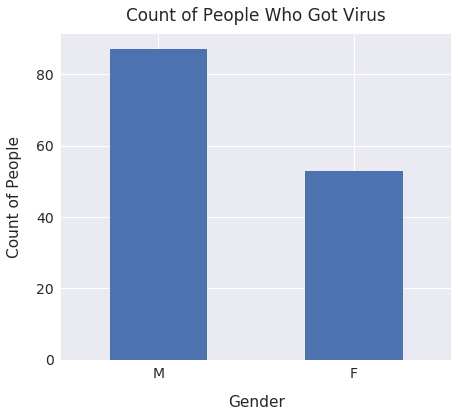

In [9]:
sns.set(font_scale=1.4)
df_main['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Got Virus", y=1.02);

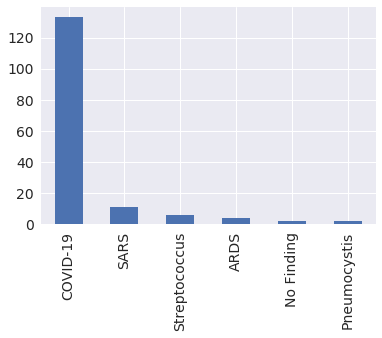

In [10]:
df_main['finding'].value_counts().plot(kind='bar');

- As this dataset is highly imbalanced due to more COVID-19 cases. I will add some images of Normal X-Ray from another dataset.

In [11]:
#taking only COVID-19 images for current dataset of covid.
df_main_covid = data[(data['finding'] == 'COVID-19')]

In [12]:
df_main_covid.head(n=5)

Patientid  offset sex   age   finding survival view modality  \
0          2     0.0   M  65.0  COVID-19        Y   PA    X-ray   
1          2     3.0   M  65.0  COVID-19        Y   PA    X-ray   
2          2     5.0   M  65.0  COVID-19        Y   PA    X-ray   
3          2     6.0   M  65.0  COVID-19        Y   PA    X-ray   
4          4     0.0   F  52.0  COVID-19      NaN   PA    X-ray   

               date                                           location  \
0  January 22, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
1  January 25, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
2  January 27, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
3  January 28, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
4  January 25, 2020  Changhua Christian Hospital, Changhua City, Ta...   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   

                                     clinical notes other notes Unnamed: 16  
0     infiltrate in the upper lobe of the left lung         NaN         NaN  
1          progressive infiltrate and consolidation         NaN         NaN  
2          progressive infiltrate and consolidation         NaN         NaN  
3          progressive infiltrate and consolidation         NaN         NaN  
4  diffuse infiltrates in the bilateral lower lungs         NaN         NaN

In [13]:
#filling NaN
df_main_covid = df_main_covid.fillna('UnKnown')

In [14]:
df_main_covid.head(n=5)

Patientid offset sex age   finding survival view modality  \
0          2      0   M  65  COVID-19        Y   PA    X-ray   
1          2      3   M  65  COVID-19        Y   PA    X-ray   
2          2      5   M  65  COVID-19        Y   PA    X-ray   
3          2      6   M  65  COVID-19        Y   PA    X-ray   
4          4      0   F  52  COVID-19  UnKnown   PA    X-ray   

               date                                           location  \
0  January 22, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
1  January 25, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
2  January 27, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
3  January 28, 2020        Cho Ray Hospital, Ho Chi Minh City, Vietnam   
4  January 25, 2020  Changhua Christian Hospital, Changhua City, Ta...   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url  license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...  UnKnown   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...  UnKnown   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...  UnKnown   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...  UnKnown   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...  UnKnown   

                                     clinical notes other notes Unnamed: 16  
0     infiltrate in the upper lobe of the left lung     UnKnown     UnKnown  
1          progressive infiltrate and consolidation     UnKnown     UnKnown  
2          progressive infiltrate and consolidation     UnKnown     UnKnown  
3          progressive infiltrate and consolidation     UnKnown     UnKnown  
4  diffuse infiltrates in the bilateral lower lungs     UnKnown     UnKnown

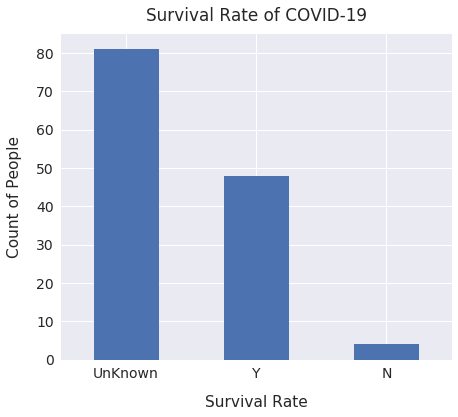

In [15]:
sns.set(font_scale=1.4)
df_main_covid['survival'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Survival Rate", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Survival Rate of COVID-19", y=1.02);

### 2. Mixing the Data from COVID-19, PNUEMONIA, NORMAL X-RAY's.

In [16]:
#!ls

#### 1. Normal DataFrame

In [17]:
#processing the normal x-ray DataFrames
from fastai.vision import *
normal_input_path = Path('Data/chest_xray/train/NORMAL/') 
fnames = get_image_files(normal_input_path)


fnames = map(lambda x: ['NORMAL', x], fnames)
normal_xray_df = pd.DataFrame(fnames, columns=['finding', 'filename'])

In [18]:
normal_xray_df.head()

finding                                           filename
0  NORMAL  Data/chest_xray/train/NORMAL/NORMAL2-IM-0452-0...
1  NORMAL  Data/chest_xray/train/NORMAL/NORMAL2-IM-0816-0...
2  NORMAL  Data/chest_xray/train/NORMAL/NORMAL2-IM-0479-0...
3  NORMAL  Data/chest_xray/train/NORMAL/NORMAL2-IM-1307-0...
4  NORMAL  Data/chest_xray/train/NORMAL/NORMAL2-IM-0892-0...

#### Trimming the NORMAL class to balance it with COVID Samples.

In [19]:
normal_xray_df = normal_xray_df.head(n=300)

In [20]:
normal_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
finding     300 non-null object
filename    300 non-null object
dtypes: object(2)
memory usage: 4.8+ KB


#### 2. COVID-19 DataFrame

In [21]:
df_main_covid = df_main_covid[['finding','filename']]
df_main_covid.head(n=5)

finding                                           filename
0  COVID-19  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1  COVID-19  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2  COVID-19  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3  COVID-19  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4  COVID-19                              nejmc2001573_f1a.jpeg

In [22]:
input_path = Path('Data/covid-small-set/') 

def makeFilename(x = ''):
    return input_path/f'images/{x}'

df_main_covid['filename'] = df_main_covid['filename'].apply(makeFilename)
df_main_covid = df_main_covid[['finding', 'filename']]

In [23]:
df_main_covid.head()

finding                                           filename
0  COVID-19  Data/covid-small-set/images/auntminnie-a-2020_...
1  COVID-19  Data/covid-small-set/images/auntminnie-b-2020_...
2  COVID-19  Data/covid-small-set/images/auntminnie-c-2020_...
3  COVID-19  Data/covid-small-set/images/auntminnie-d-2020_...
4  COVID-19  Data/covid-small-set/images/nejmc2001573_f1a.jpeg

#### 3. Pnuemonia DataFrame

In [24]:
#creating an empty main DataFrame
pnuemonia_input_path = Path('Data/chest_xray/train/PNEUMONIA/') 
fnames = get_image_files(pnuemonia_input_path)


fnames = map(lambda x: ['PNEUMONIA', x], fnames)
pnuemonia_xray_df = pd.DataFrame(fnames, columns=['finding', 'filename'])

#### Trimming PNUEMONIA CLASS SAMPLES TO MATCH BALANCE IT WITH COVID SAMPLES.

In [25]:
pnuemonia_xray_df = pnuemonia_xray_df.head(n=300)

In [26]:
print(f'{df_main_covid.info()}')
print(f'{pnuemonia_xray_df.info()}')
print(f'{normal_xray_df.info()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 157
Data columns (total 2 columns):
finding     133 non-null object
filename    133 non-null object
dtypes: object(2)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
finding     300 non-null object
filename    300 non-null object
dtypes: object(2)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
finding     300 non-null object
filename    300 non-null object
dtypes: object(2)
memory usage: 4.8+ KB
None


#### Merging all three DataFrame into 1 main DataFrame.

In [27]:
#appending the two DataFrame of NORMAL and COVID X-rays.
df_main = pd.DataFrame(data = [], columns=['finding', 'filename'])
df_main = df_main.append([df_main_covid, normal_xray_df, pnuemonia_xray_df], ignore_index=True)
df_main.head(n=5)

finding                                           filename
0  COVID-19  Data/covid-small-set/images/auntminnie-a-2020_...
1  COVID-19  Data/covid-small-set/images/auntminnie-b-2020_...
2  COVID-19  Data/covid-small-set/images/auntminnie-c-2020_...
3  COVID-19  Data/covid-small-set/images/auntminnie-d-2020_...
4  COVID-19  Data/covid-small-set/images/nejmc2001573_f1a.jpeg

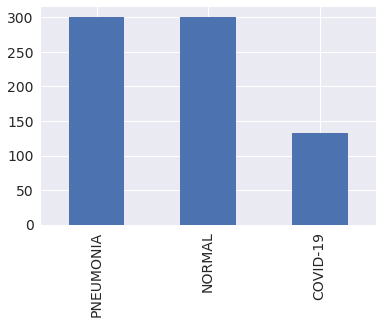

In [28]:
df_main['finding'].value_counts().plot(kind='bar');

In [29]:
from fastai.vision import *
from PIL import Image

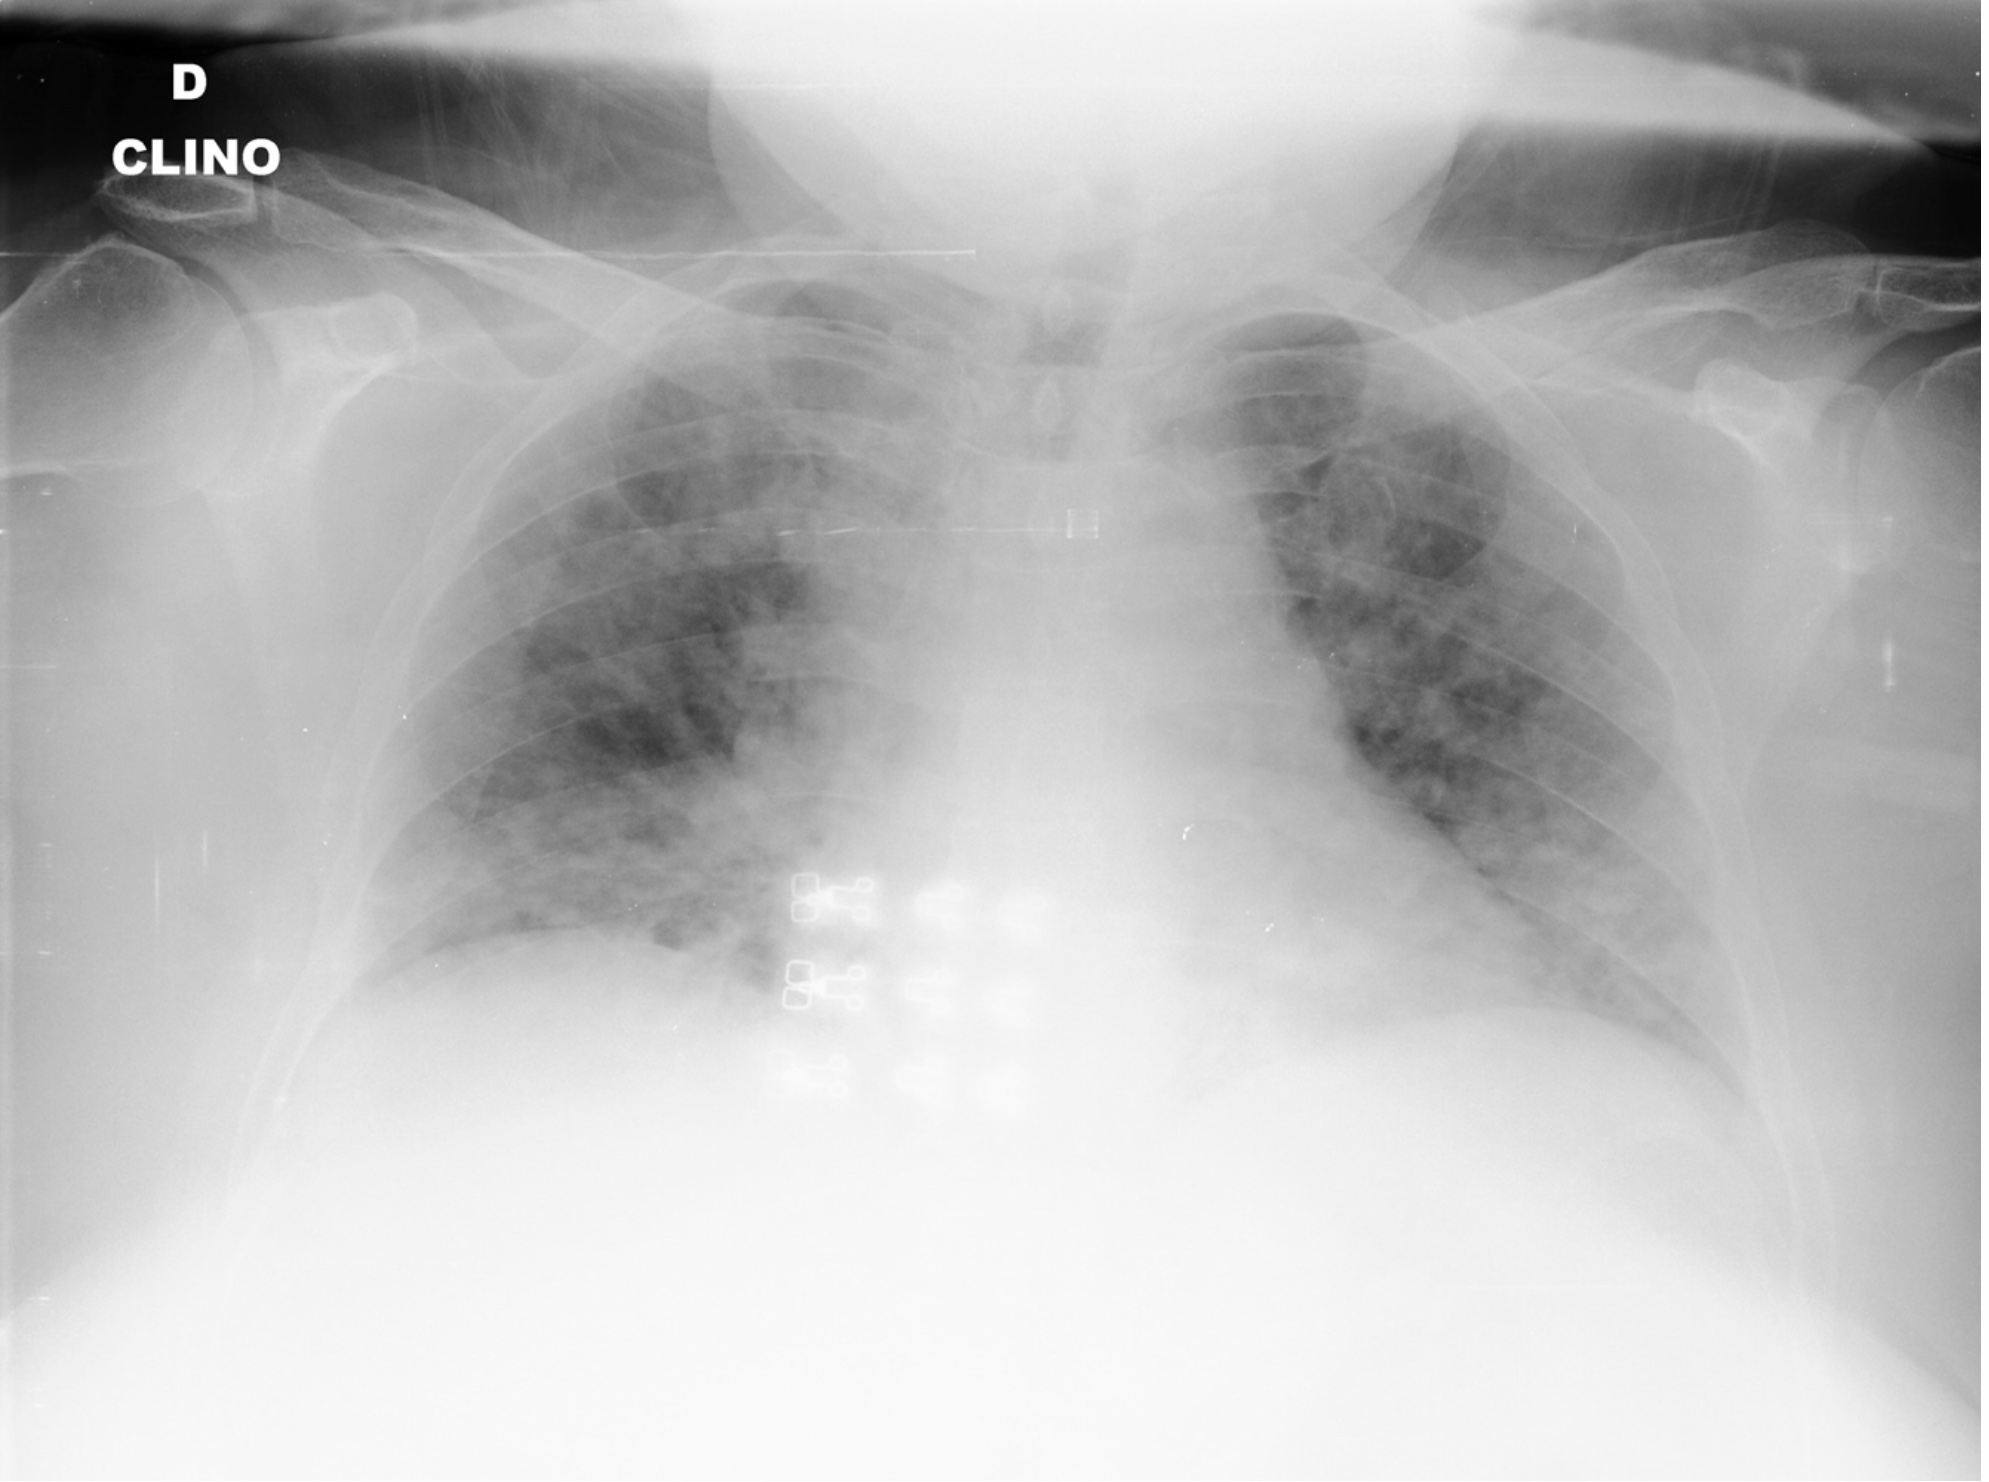

In [30]:
#display a sample of COVID
img = Image.open('Data/covid-small-set/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
display(img)

In [31]:
transform = get_transforms(max_rotate=15, max_lighting=0.2)

In [32]:
data = ImageDataBunch.from_df(path = '',
                             df=df_main,
                             fn_col = 'filename',
                             valid_pct = 0.20,
                              ds_tfms = transform,
                              size =512,
                              label_col = 'finding',
                             bs=16,num_workers=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (587 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: .;

Valid: LabelList (146 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: .;

Test: None

In [33]:
print(f'Number of samples for Training: {len(data.train_ds)}')
print(f'Number of samples for Validation: {len(data.valid_ds)}')

Number of samples for Training: 587
Number of samples for Validation: 146


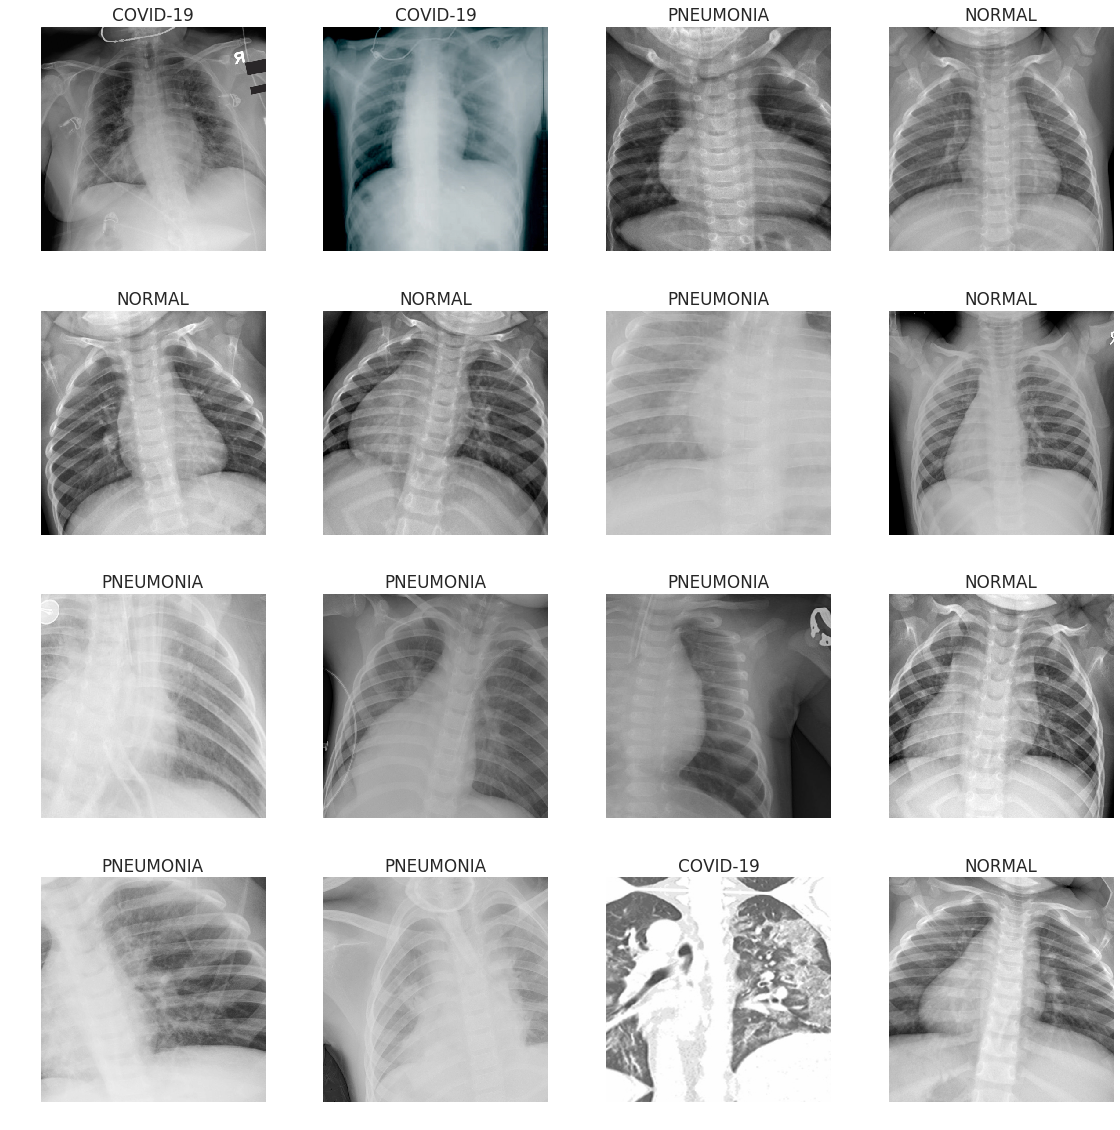

In [34]:
data.show_batch()

In [35]:
model = cnn_learner(data = data,
                    base_arch=models.resnet50, metrics = [accuracy])

In [36]:
model.fit_one_cycle(cyc_len=10)

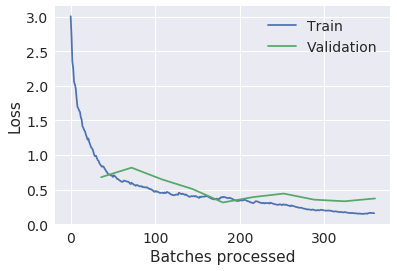

In [37]:
model.recorder.plot_losses()

In [38]:
interp = ClassificationInterpretation.from_learner(model)

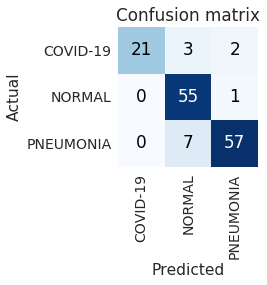

In [39]:
interp.plot_confusion_matrix()

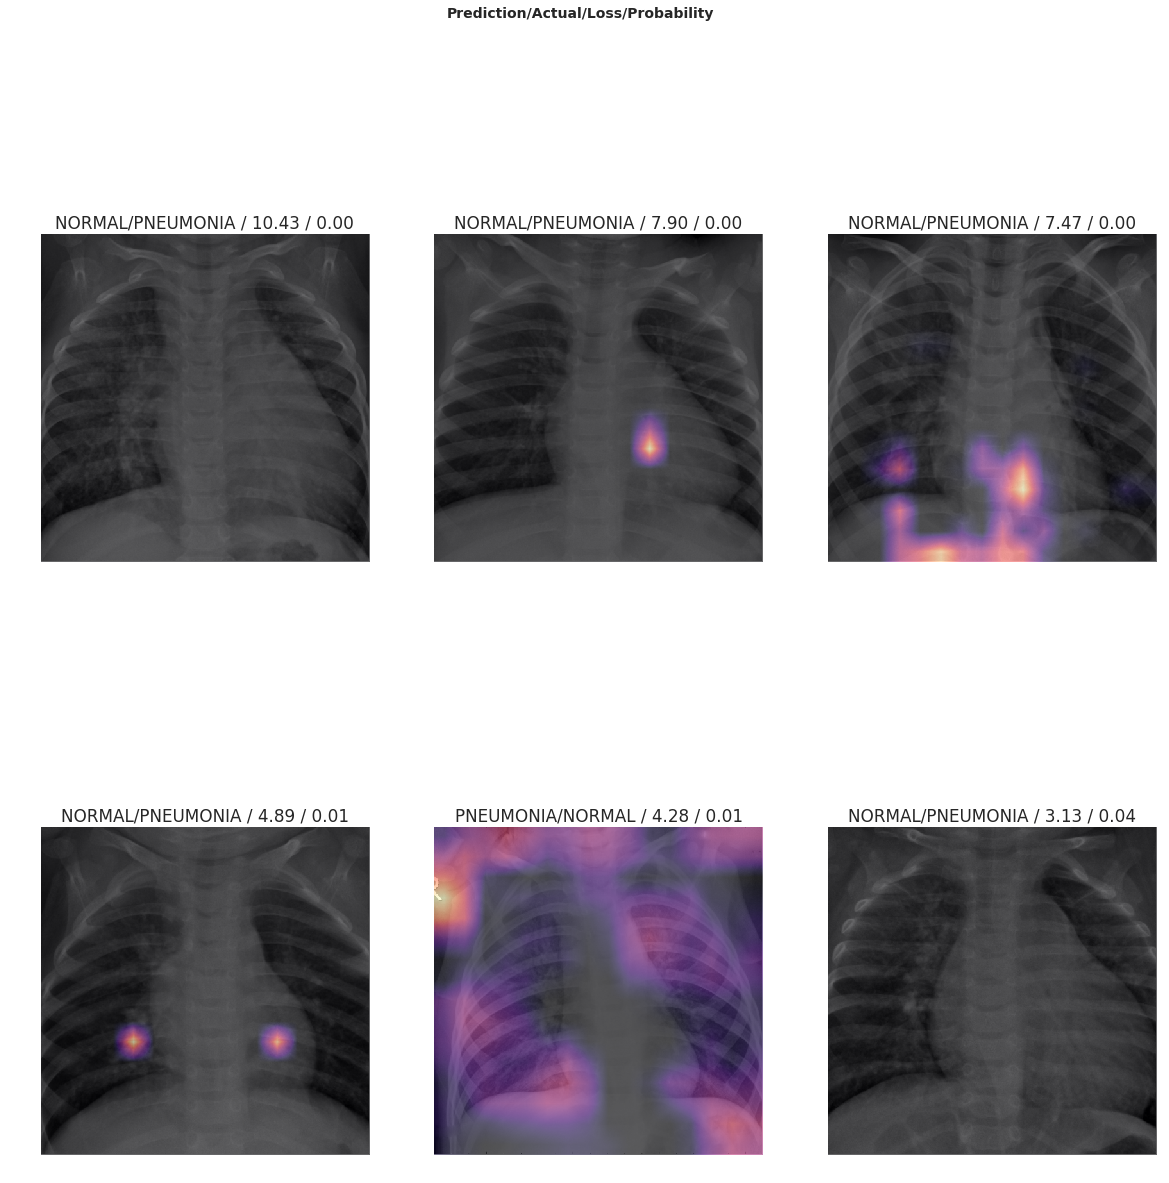

In [40]:
import matplotlib.pyplot as plt
interp.plot_top_losses(k=6,heatmap=True,figsize=(20,20))

In [41]:
model.unfreeze()

In [44]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.75E-05


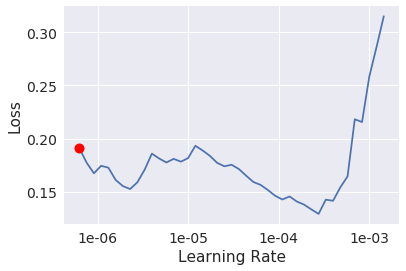

In [49]:
model.recorder.plot(suggestion=True)

In [50]:
model.fit_one_cycle(cyc_len=10,max_lr=slice(5e-3/(2.6**4),5e-3))

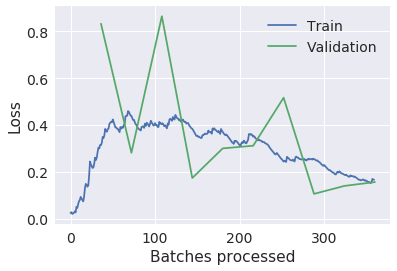

In [51]:
model.recorder.plot_losses()

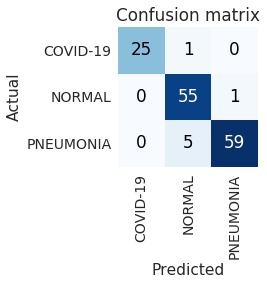

In [52]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

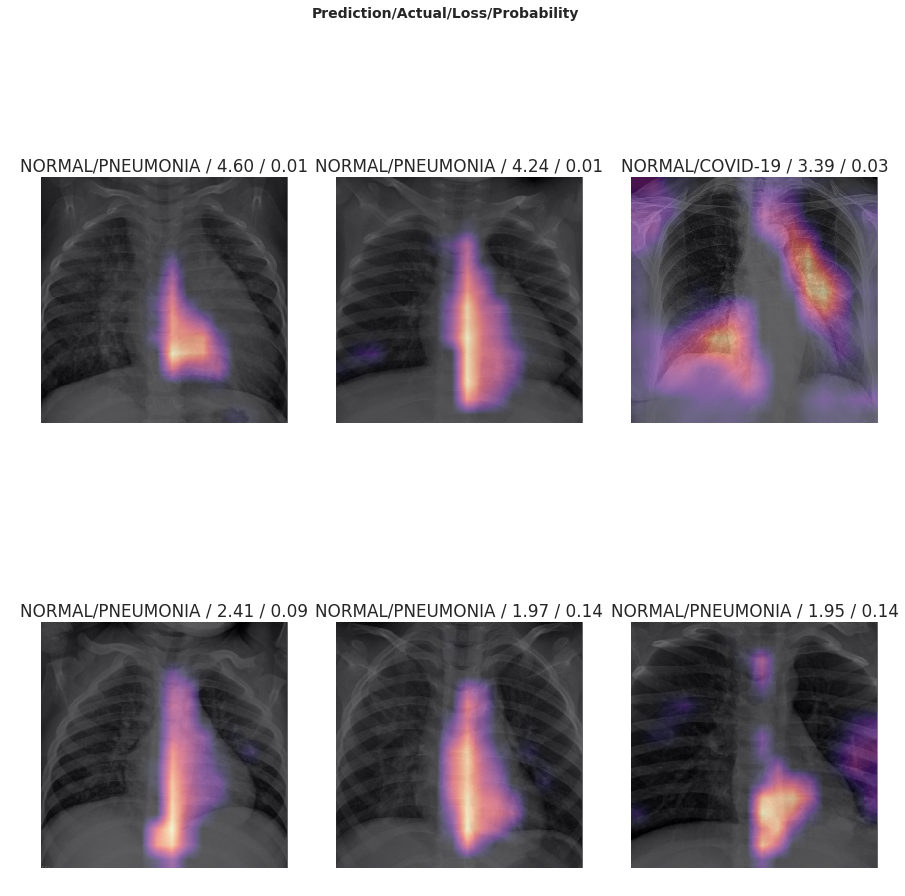

In [53]:
interp.plot_top_losses(k=6,heatmap=True, figsize=(15,15))

In [ ]:
#### From the CONFUSION MATRIX WE FOUND THAT 5 IMAGES FOR PNUEMONIA IS GETTING PREDICTED AS NORMAL>
#### LET'S TRY TO AVOID THOSE IMAGES 

In [58]:
#model.save('covid-19-512-1')
model.export()

In [59]:
model.freeze()

In [60]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-07
Min loss divided by 10: 7.59E-08


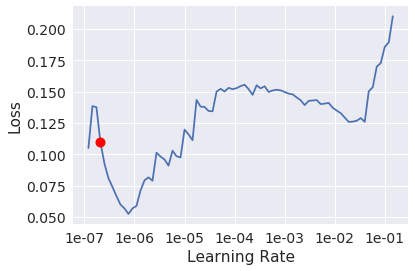

In [62]:
model.recorder.plot(skip_start=True,
                    skip_end=True, suggestion=True)

In [66]:
model.fit_one_cycle(cyc_len=8,max_lr=slice(5e-3/(2.6**4),5e-3) )

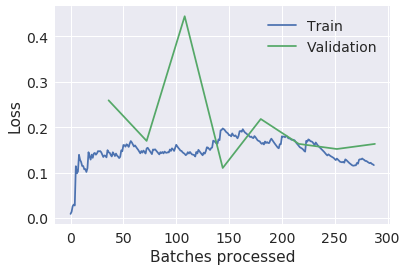

In [67]:
model.recorder.plot_losses()

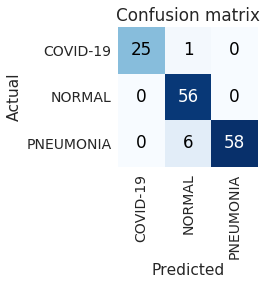

In [68]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

### We are continuosly getting 6 False-Positive for NORMAL from PNEUMONIA  class. It is better to remove these 6 Images and re-train the model.

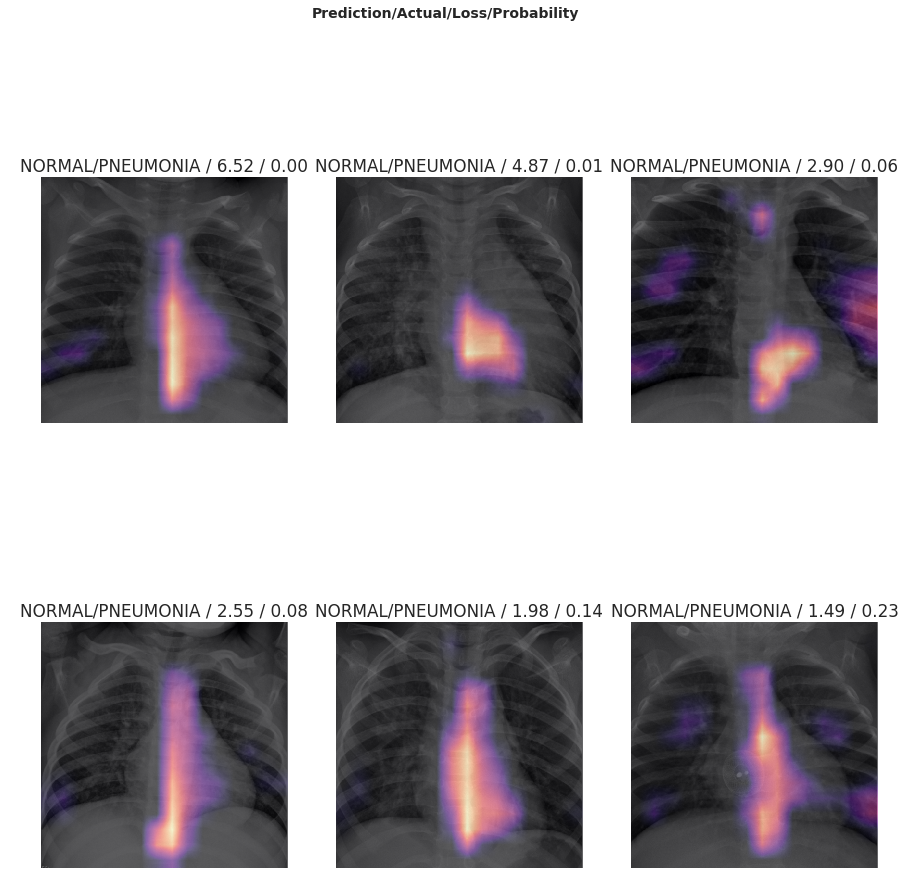

In [69]:
interp.plot_top_losses(k=6,heatmap=True, figsize=(15,15))

In [70]:
from fastai.widgets import *

In [71]:
path = Path('Data/chest_xray/test/PNEUMONIA/')
ds, idxs = DatasetFormatter().from_toplosses(model, ds_type = DatasetType.Valid)
ImageCleaner(ds, idxs,path )

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [73]:
#model.unfreeze()
model.fit_one_cycle(cyc_len=5, max_lr=slice(1e-06))

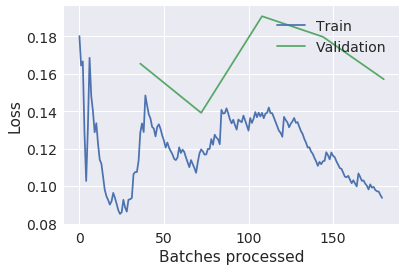

In [74]:
model.recorder.plot_losses()

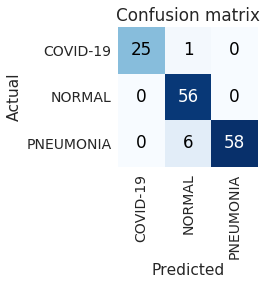

In [75]:
interp = ClassificationInterpretation.from_learner(learn=model)
interp.plot_confusion_matrix()

In [76]:
#model.save('resnet34-COVID-19')

### Conclusion
- Our model gave ovreall 95% Accuracy on Validation set.
- Model gave 99% accuracy between COVID and NORMAL x-ray's.
- Model gave 95% accuracy between NORMAL and PNUEMONIA.
- Model gave some false positive because we trimmed the number of samples for NORMAL and PNUEMONIA cases in order to have uniform samples as compared to COVID cases. 


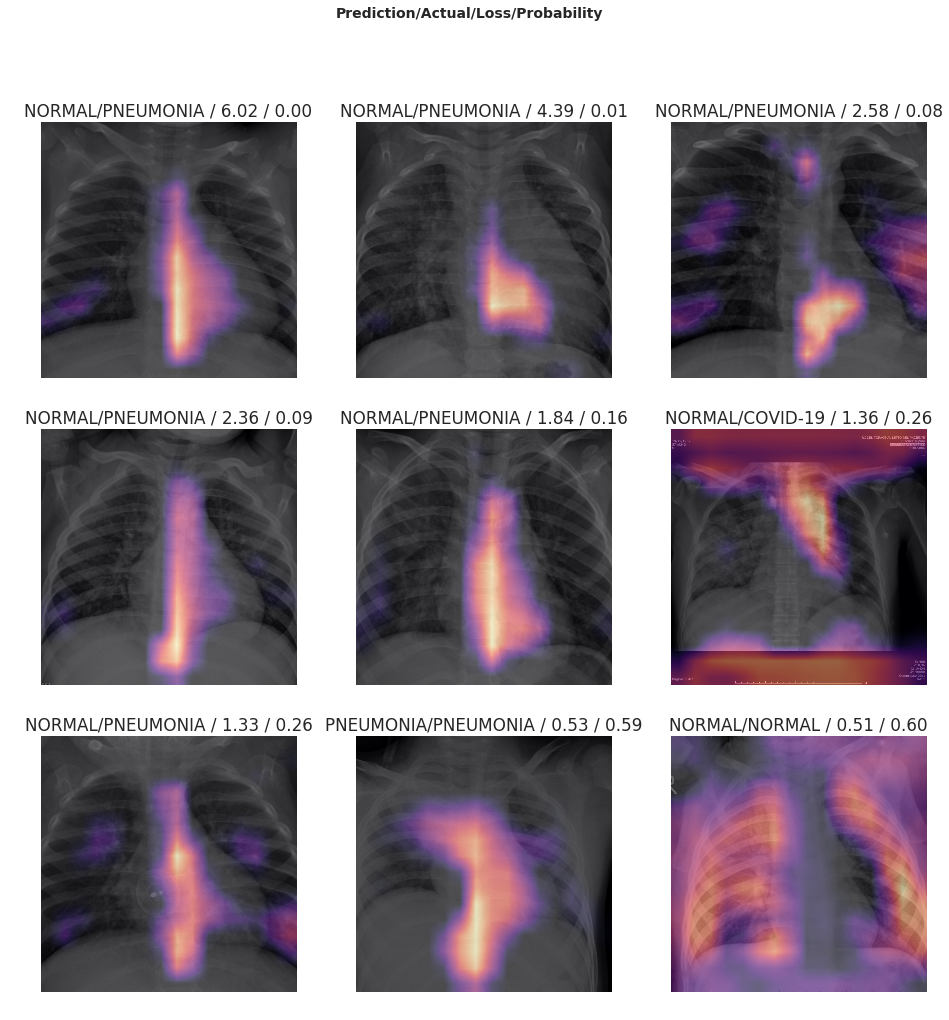

In [78]:
interp.plot_top_losses(k=9,heatmap=True, figsize=(16,16))

In [80]:
model.save('covid-512-final')
model.export()